In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
titanic = pd.read_csv('/content/titanic.csv')

ОДНОМЕРНЫЙ АНАЛИЗ

In [7]:
# первые 5 объектов
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# случайные 5 объектов
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


In [5]:
# последние 5 объектов
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# посмотрим на кол. пропущенных/непустых начений, тип/статистику значений и кол. занимаемой памяти
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# найдем пропуски в датафрейме и просуммируем их по столбцам
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# пропущ.значения в % соотношении
(titanic.isna().sum()/len(titanic)).round(4)*100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [9]:
# модуль для графической визуальзации данных
! pip install missingno

In [10]:
import missingno as msno
# делаем стиль seaborn основным
sns.set()

<Axes: >

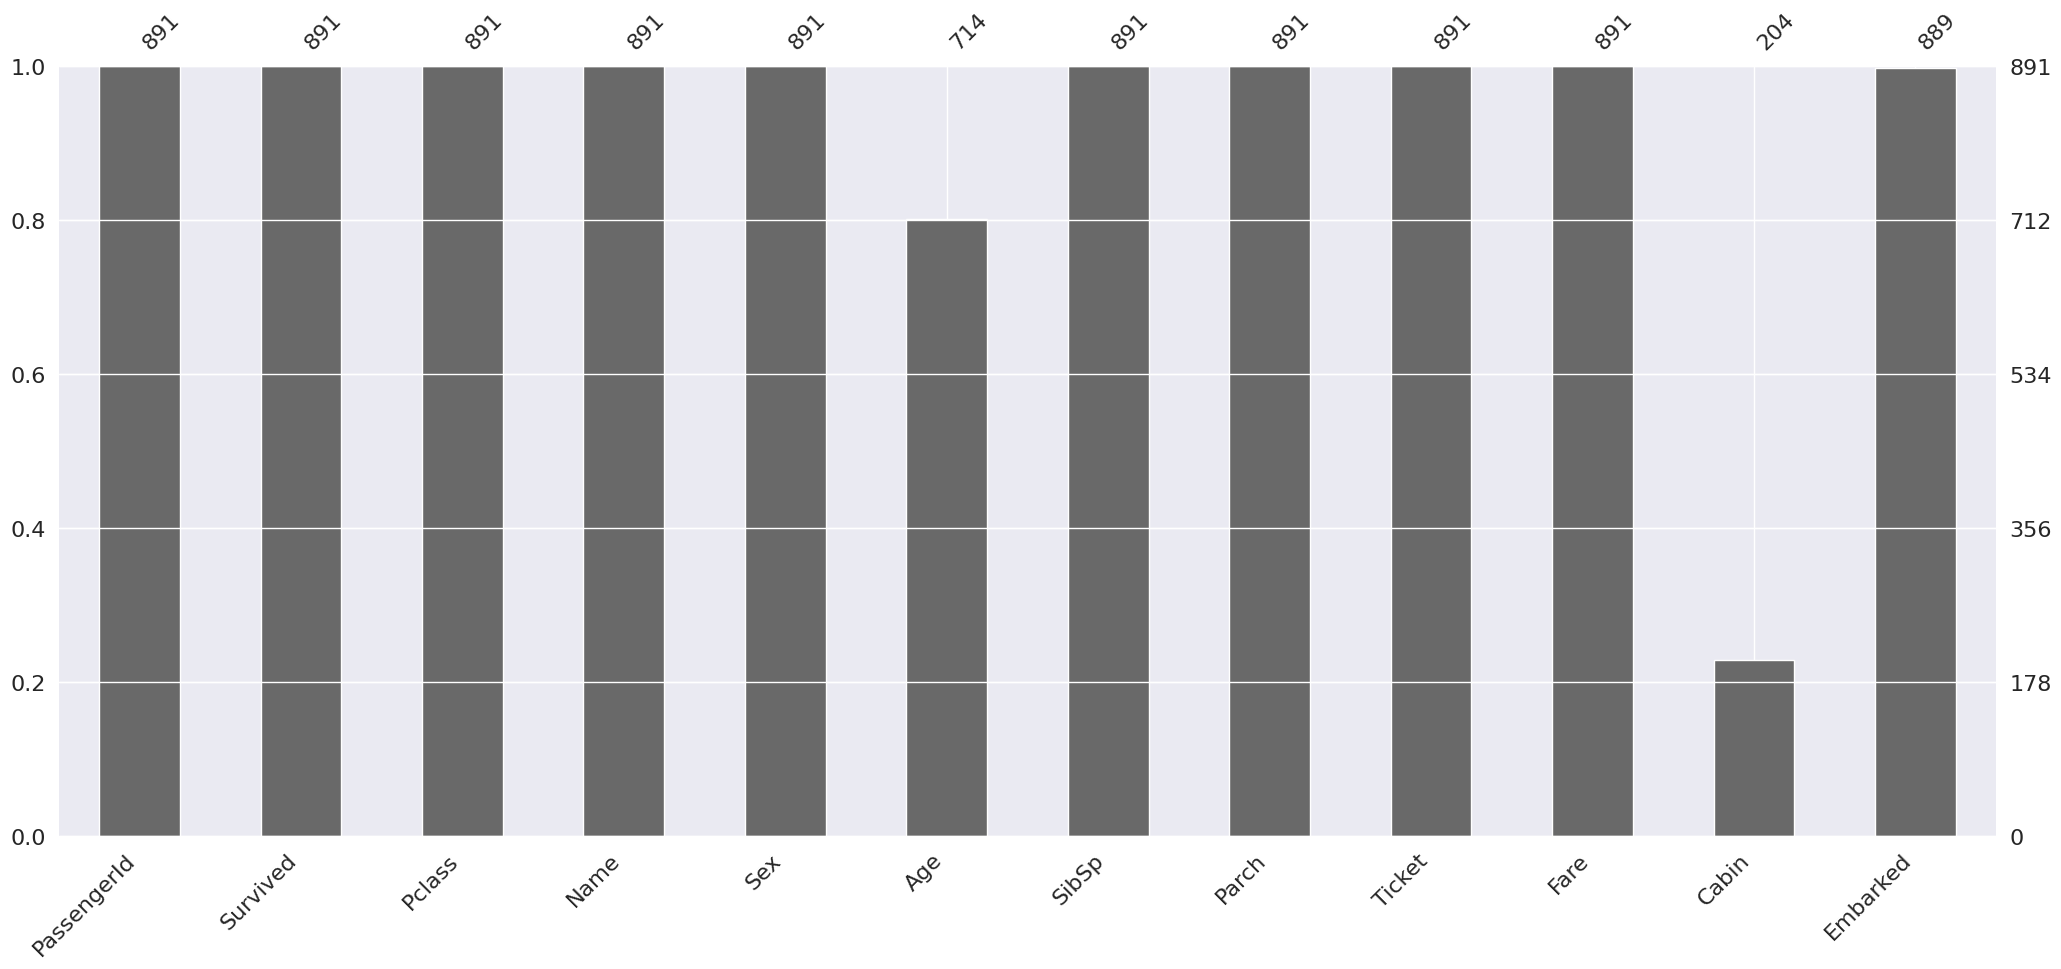

In [11]:
# визиализируем пропущенные значения
msno.bar(titanic)

<Axes: >

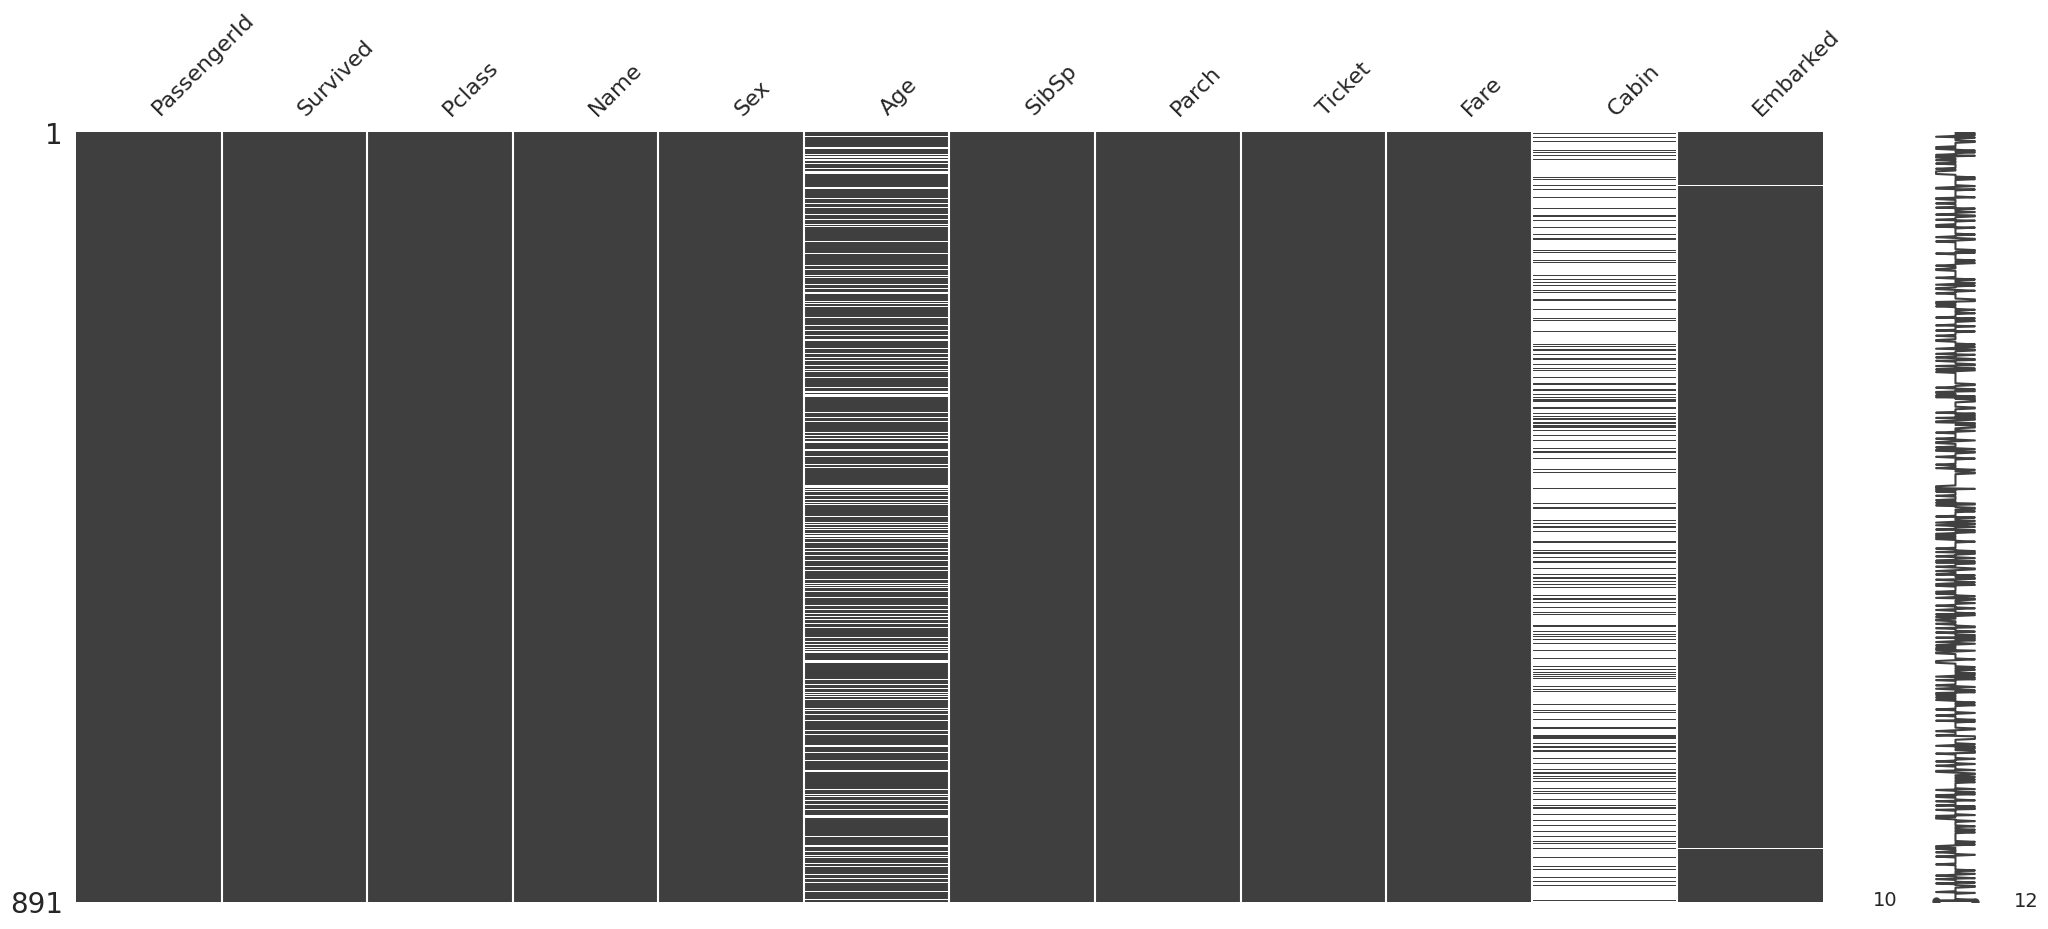

In [12]:
# матрица пропущенных значений (тепловая карта)
msno.matrix(titanic)

In [13]:
# удаление строк обозначим axis = 'index', inplace=True - изменения вносятся в исходный датасет
# subset = ['Embarked'] - ищем пропуски только в столбце Embarked
titanic.dropna(axis = 'index', subset = ['Embarked'], inplace=True)

In [14]:
# убедимся, что пропусков больше нет
titanic.Embarked.isna().sum()

0

In [15]:
# удаление столбцов (где пропусков более 70% востанавливать нет смысла)
titanic.drop(columns = ['Cabin'], inplace=True)

In [16]:
# убедимся, что столбец удален
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
# Количественные данные
# Заполнение константой, метод fillna
# сделаем копию датасета, чтобы сравнить результаты как с заполнением и без повлияет на статистич параметры
fillna_const = titanic.copy()

In [19]:
# Заполним пропуски в столбце Age нулями, передав методу ..fillna() словарь,
# где ключами будут названия столбцов, а значениями - константы для заполнения пропусков
fillna_const.fillna({'Age' : 0}, inplace=True)

In [20]:
# Посмотрим, как такое заполнение отразилось на данных
titanic.Age.median(),  fillna_const.Age.median()

(28.0, 24.0)

In [23]:
# Категориальные данные
# найдем пассажиров с неизвестным портом посадки
# для этого создадим маску по столбцу Embarked и применим ее к исходным данным
missing_embarked = pd.read_csv('/content/titanic.csv')
missing_embarked[missing_embarked.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


поиск в интернете выдает информацию, что оба пассажира: Mrs.Stone и ее служанка Miss. Amelie зашли на борт в порту Southampton(S)

In [24]:
# метод .fillna() можно применить к одному столбцу
# два пропущенных значения в столбце Embarked заполним буквой S (Southampton)
fillna_const.Embarked.fillna('S', inplace=True)

In [25]:
# убедимся, что в столбцах Age, Embarked не осталось пропущенных значений
fillna_const[['Age', 'Embarked']].isna().sum()

Age         0
Embarked    0
dtype: int64

In [27]:
# Методы .unique() и .value_counts()
# применим метод библиотеки Numpy
np.unique(titanic.Survived, return_counts = True)

(array([0, 1]), array([549, 340]))

In [28]:
# теперь воспользуемся методи библиотеки Pandas
# первый метод возвращает только уникальные значения
titanic.Survived.unique()

array([0, 1])

In [29]:
# второй - уникальные значения и их частоту
titanic.Survived.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [30]:
# для получения относительной частоты, делить на общее количество строк не нужно
# достаточно указать параметр normalize = True
titanic.Survived.value_counts(normalize = True)

Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

In [31]:
# Краткий статист.обзор наших данных
titanic[['Sex', 'Embarked']].describe()

,Sex,Embarked
count,889,889
unique,2,3
top,male,S
freq,577,644


<Axes: xlabel='Survived', ylabel='count'>

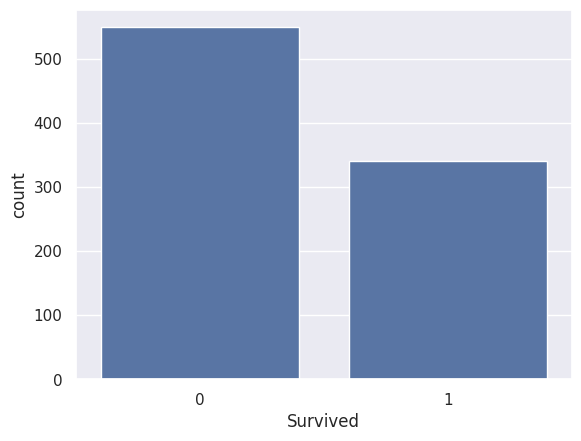

In [32]:
# Seaborn
# функция countplot() сама посчитает количество наблюдений в каждой из категорий
sns.countplot(x = 'Survived', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

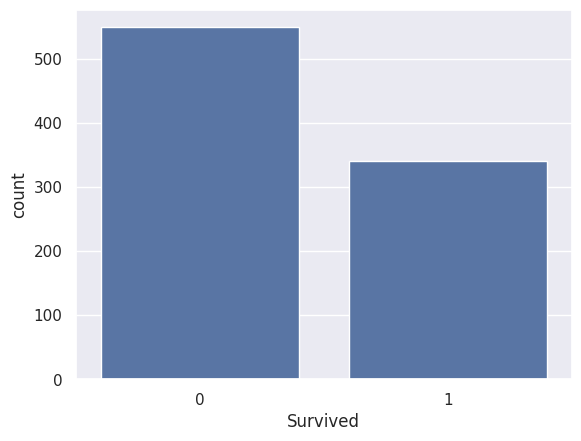

In [33]:
# для функции batplot() количество наблюдений можно посчитать с помощью метода .value_counts()
sns.barplot(x = titanic.Survived, y = titanic.Survived.value_counts())

In [34]:
# функция для количественных данных
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
titanic['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(array([ 54.,  46., 177., 169., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

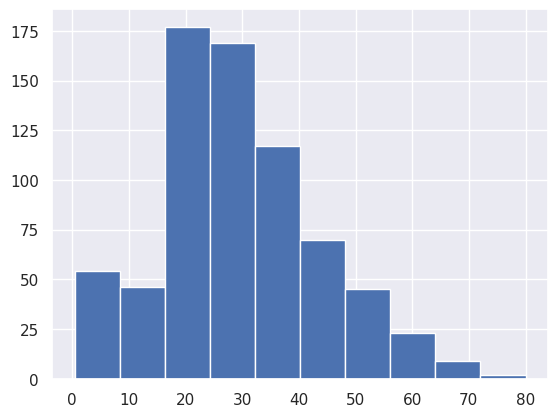

In [37]:
# гистограмма распределения возраста с помощью библиотеки Matplotlib
plt.hist(titanic.Age, bins = 10)

<Axes: xlabel='Age', ylabel='Count'>

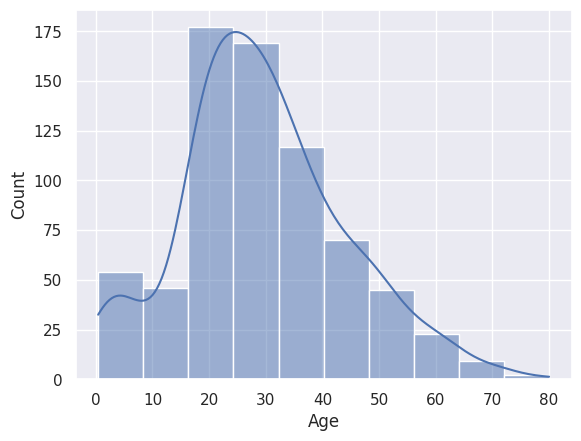

In [38]:
# Интерполируем
# в библиотеке Seaborn мы указываем источник данных, что будет на оси Х и количество интервалов
# параметр kde = True добавляет кривую плотности распределения
sns.histplot(data = titanic, x = 'Age', bins = 10, kde = True)

РАБОТА С ДВУМЯ КАТЕГОРИАЛЬНЫМИ ПРИЗНАКАМИ

<Axes: xlabel='Pclass', ylabel='count'>

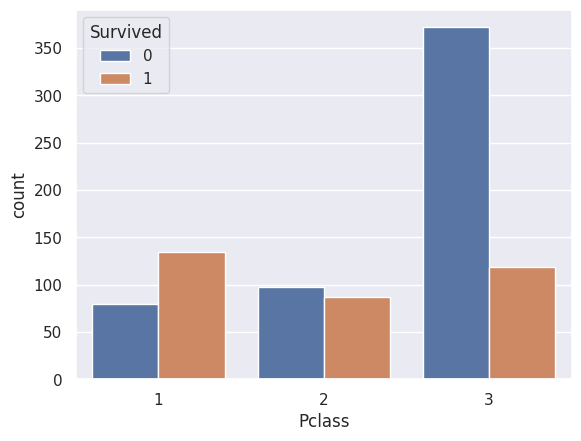

In [39]:
# countplot и barplot
# создадим grouped countplot, где по оси х будет класс, а по оси у - количество пассажиров
# в каждом классе данные разделены на погибших (0) и выживших(1)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic)

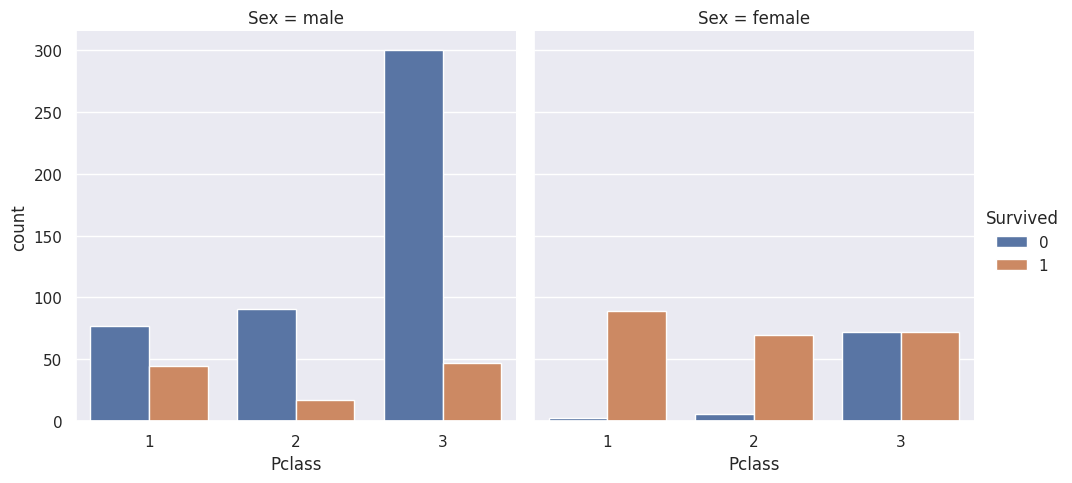

In [42]:
# добавим еще один признак (пол) через параметр col
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = titanic)

(array([36., 19., 63., 65., 51., 24., 21.,  8.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

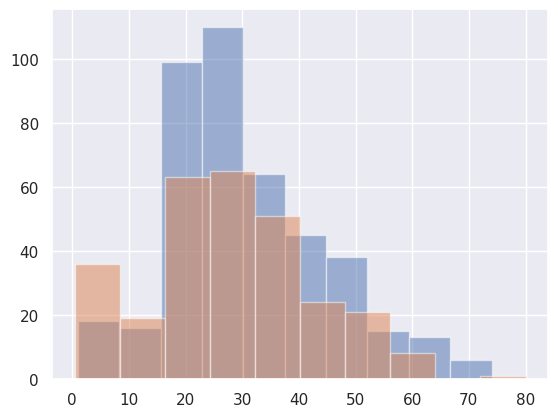

In [43]:
# Посмотрим на взаимодействие количественной и категориальной переменной
# когда есть одна колич-я и одна категориал. проще постоить 2 наложенные друг на друга гистограммы
# выведем 2 гистограммы на одом графике в библиотеке Matplotlib
# отфильтруем данные по погибшим и выжившим и построим гистограммы по "Age"
plt.hist(titanic[titanic.Survived == 0].Age, bins = 10, alpha = 0.5)
plt.hist(titanic[titanic.Survived == 1].Age, bins = 10, alpha = 0.5)


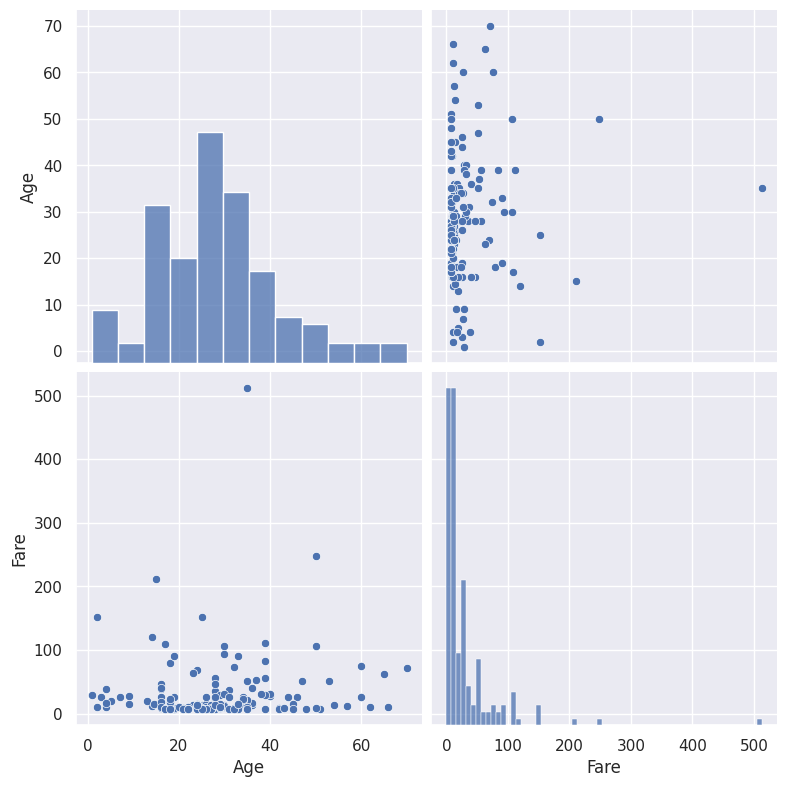

In [45]:
# для изучения взаимодействия признаков также можно использовать pairplot
# параметр height функции pairplot() задает высоту каждого графика в дюймах, frac = 0.2 - берет для построения 20% от всех данных
sns.pairplot(titanic[['Age', 'Fare']].sample(frac = 0.2, random_state = 42), height = 4)

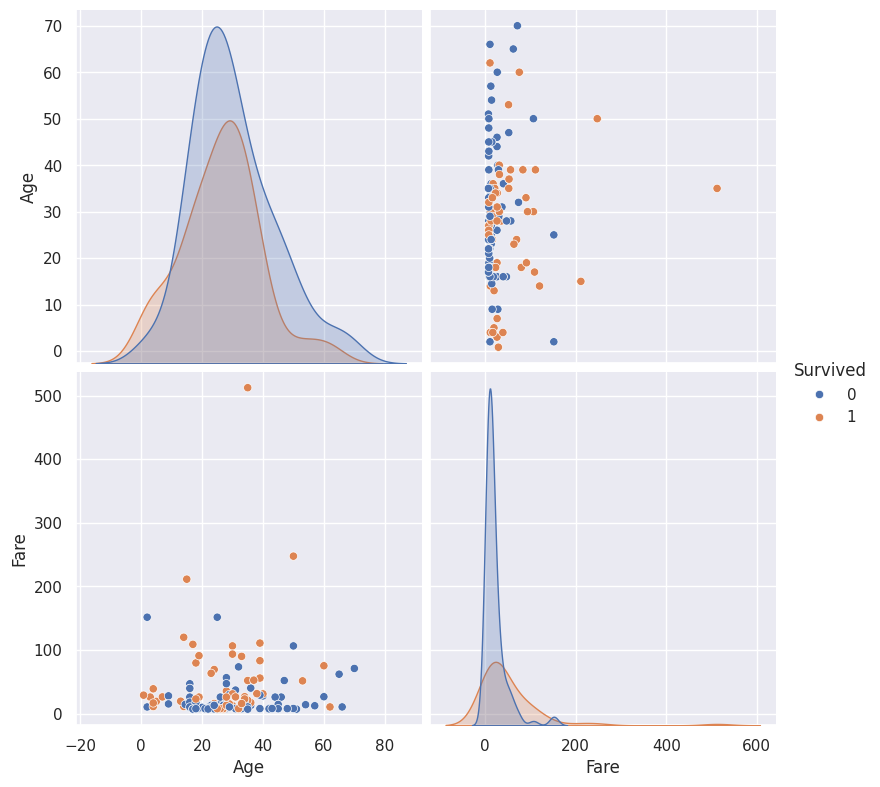

In [46]:
# добавим нашу целевую переменную
# столбец Survived добавим и в параметр hue и в датафрейм с данными
sns.pairplot(titanic[['Age', 'Fare', 'Survived']].sample(frac = 0.2, random_state = 42), hue = 'Survived', height = 4)

С помощью такого графика отвечаем на вопрос, есть ли взаимосвязь между возрастом пассажиров и стоимостью их билетов в разрезе выживаемости

In [47]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.0 MB/s eta 0:00:00


In [ ]:
# помогает сравнить обучающий датасет и тестовый
import sweetviz as sv
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
comparison = sv.compare(train, test)

In [ ]:
# применим метод .show_notebook()
comparison.show_notebook()